In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
import random

In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

In [94]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [0]:
assert(X_train.shape[0] == y_train.shape[0]),"The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]),"The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)),"The dimentions of the images are not 28X28"
assert(X_test.shape[1:] == (28,28)),"The dimentions of the images are not 28X28"


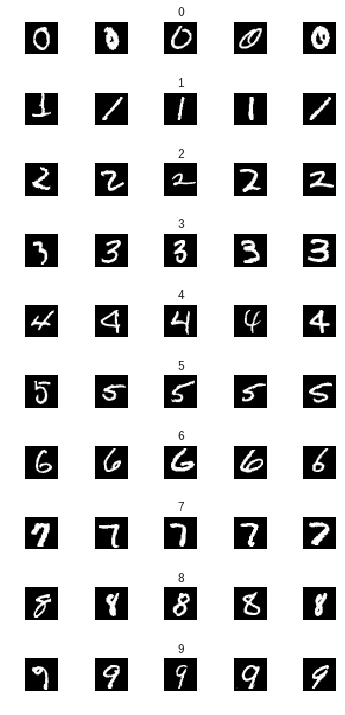

In [96]:
num_of_samples = []
cols = 5
num_classes = 10

fig,axs = plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected - 1)),:  :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0,0.5,'Number of images')

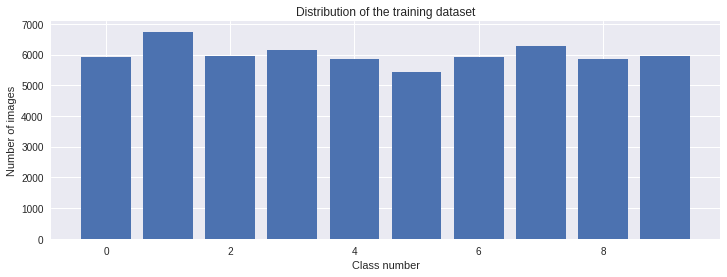

In [97]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [0]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [0]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [0]:
X_train = X_train/255
X_test = X_test/255


In [0]:
#define the leNet_model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model


In [102]:
model = leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
__________

In [103]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.1,batch_size=400,verbose=1,shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 52us/step - loss: 0.2440 - acc: 0.9221 - val_loss: 0.0526 - val_acc: 0.9835
Epoch 2/10
54000/54000 [==============================] - 2s 42us/step - loss: 0.0711 - acc: 0.9783 - val_loss: 0.0369 - val_acc: 0.9892
Epoch 3/10
54000/54000 [==============================] - 2s 42us/step - loss: 0.0573 - acc: 0.9824 - val_loss: 0.0365 - val_acc: 0.9877
Epoch 4/10
54000/54000 [==============================] - 2s 42us/step - loss: 0.0497 - acc: 0.9844 - val_loss: 0.0428 - val_acc: 0.9878
Epoch 5/10
54000/54000 [==============================] - 2s 42us/step - loss: 0.0415 - acc: 0.9868 - val_loss: 0.0495 - val_acc: 0.9872
Epoch 6/10
54000/54000 [==============================] - 2s 41us/step - loss: 0.0410 - acc: 0.9874 - val_loss: 0.0399 - val_acc: 0.9888
Epoch 7/10
54000/54000 [==============================] - 2s 42us/step - loss: 0.0395 - acc: 0.9878 - val_loss: 0.0421 - val_acc:

Text(0.5,0,'epoch')

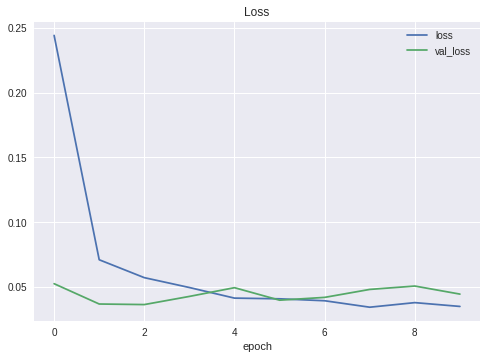

In [104]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

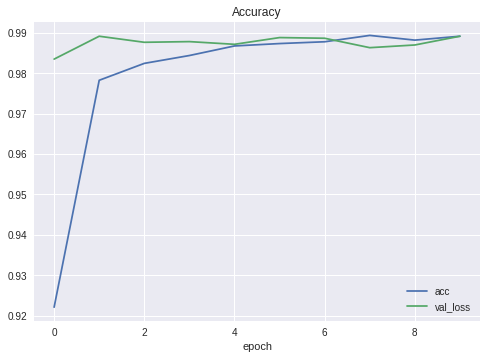

In [105]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_loss'])
plt.title('Accuracy')
plt.xlabel('epoch')

<Response [200]>


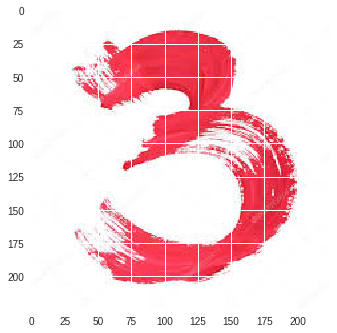

In [106]:
import requests
from PIL import Image
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
#url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'

response = requests.get(url,stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

[[  0   2   2   0   0   0   0   0   1   0   0   0   0   0   0   4   1   0
    0   0   0   0   1   0   0   0   0   0]
 [  2   1   1   0   0   0   0   1   0   1   0   0   3   4   5   2   1   0
    0   0   0   1   0   1   0   0   0   0]
 [  1   0   0   1   0   0   1   2   0   2  16 179 179 176 183 184 168   4
    0   0   1   0   0   0   1   0   0   1]
 [  0   0   0   0   1   2   3 172  10 187 175 178 179 176 177 180 182 181
    9   1   0   0   0   0   0   2   1   0]
 [  0   0   0   0   1   4  36  90 170 181 186 183 175 176 177 176 176 182
  179   2   0   0   0   0   0   0   1   0]
 [  1   0   0   5 172  17   2 154 172 157 178 189 182 182 179 182 171 183
  171   4   0   1   0   3   1   0   0   0]
 [  0   1   1   0  86 103  51  82 152 171 167 177 179 179 178 177 171 187
  175   1   0   0   3   1   0   0   0   0]
 [  1   0   1   0   7 164  75  60 161 170 178 123  18  97 198 187 180 171
  164   0   1   2   1   1   0   0   0   0]
 [  0   0   0   1   0   3  76 172 133 165   5   1   0   1   7 19

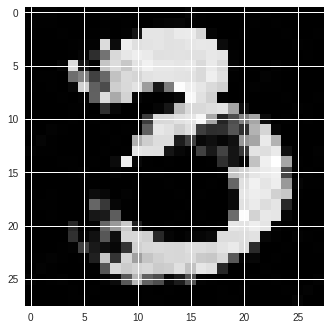

In [107]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array,(28,28))
gray_scale = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image,cmap=plt.get_cmap("gray"))
print(image)

In [0]:
image=image/255
image = image.reshape(1,28,28,1)

In [109]:
prediction = model.predict_classes(image)
print("predicted digit:",str(prediction))

predicted digit: [3]


In [110]:
score = model.evaluate(X_test,y_test,verbose=0)
print(type(score))
print('Test score:',score[0])
print('Test accuracy:',score[1])

<class 'list'>
Test score: 0.03826580770324376
Test accuracy: 0.9893


In [116]:
layer1 = Model(inputs=model.layers[0].input,outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input,outputs=model.layers[2].output)
visual_layer1,visual_layer2 = layer1.predict(image), layer2.predict(image)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


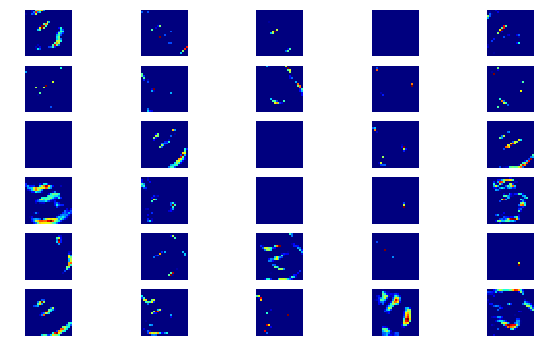

In [118]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6,5,i+1)
  plt.imshow(visual_layer1[0, :, :, i],cmap=plt.get_cmap('jet'))
  plt.axis('off')

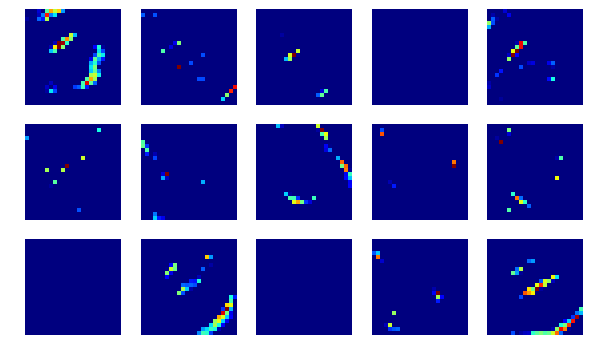

In [119]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(visual_layer1[0, :, :, i],cmap=plt.get_cmap('jet'))
  plt.axis('off')